In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

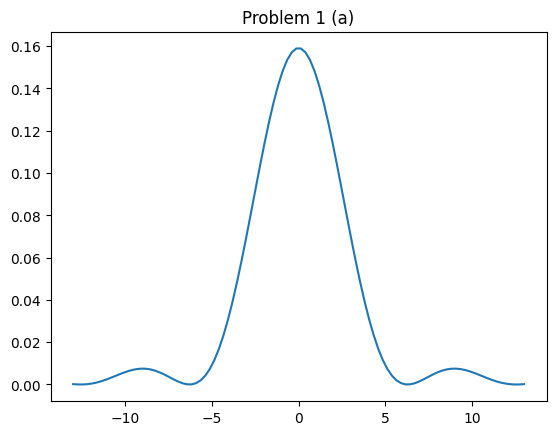

In [37]:
# Problem 1 (a)
def xc(t):
  t = np.array(t)
  return np.where(t != 0., 
                  2 * (np.sin(t / 2) ** 2) / (np.pi * (t ** 2)), 
                  1. / (2 * np.pi))
  # return 2 * np.pi * np.sin(t / 2) ** 2 / (np.pi ** 2 * t ** 2)

def Xc(w):
  w = np.array(w)
  return np.where(np.abs(w) <= 1.,
                  1. - np.abs(w),
                  0.)

t = np.linspace(-13, 13, 100)
plt.plot(t, xc(t))
plt.title("Problem 1 (a)")
plt.show()


In [38]:
# Problem 1 (b)

def sample(x, T):
  def x1(n):
    return x(np.array(n * T))
  return x1

x1 = sample(xc, 1)
x2 = sample(xc, 5)

/var/folders/24/fl4p3hx9297by7rlfvn4myh00000gn/T/ipykernel_39221/4140963447.py:5: RuntimeWarning: invalid value encountered in divide
  2 * (np.sin(t / 2) ** 2) / (np.pi * (t ** 2)),
/Users/tean/repos/ece3250/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/tean/repos/ece3250/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


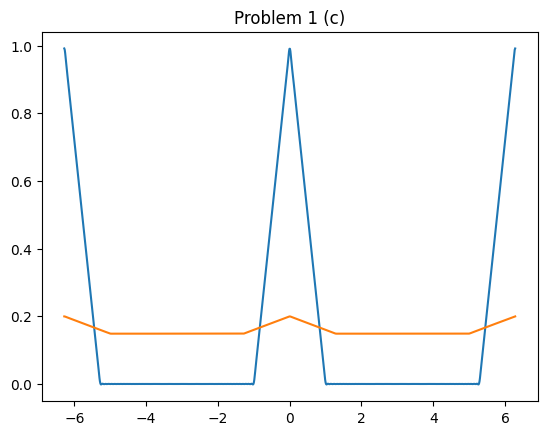

In [39]:
# Problem 1 (c)
def approx_dft(x):
  @np.vectorize
  def X(w):
    n = np.arange(-73, 74, dtype=float)
    return np.sum(x(n) * np.e ** (-1j * n * w))
  return X

X1 = approx_dft(x1)
X2 = approx_dft(x2)

w = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
plt.plot(w, X1(w))
plt.plot(w, X2(w))
plt.title("Problem 1 (c)")
plt.show()

In [51]:
# just to check if approximated dfts match expected in (-pi, pi)
# w = np.linspace(-np.pi, np.pi, 1000)
# plt.plot(w, X1(w))
# plt.plot(w, Xc(w))
# plt.plot(w, X2(w))
# plt.plot(w, 1/5 * Xc(w/5))
# plt.show()

/var/folders/24/fl4p3hx9297by7rlfvn4myh00000gn/T/ipykernel_39221/4140963447.py:5: RuntimeWarning: invalid value encountered in divide
  2 * (np.sin(t / 2) ** 2) / (np.pi * (t ** 2)),


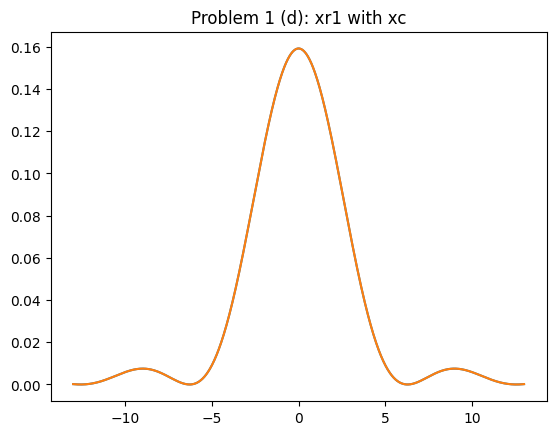

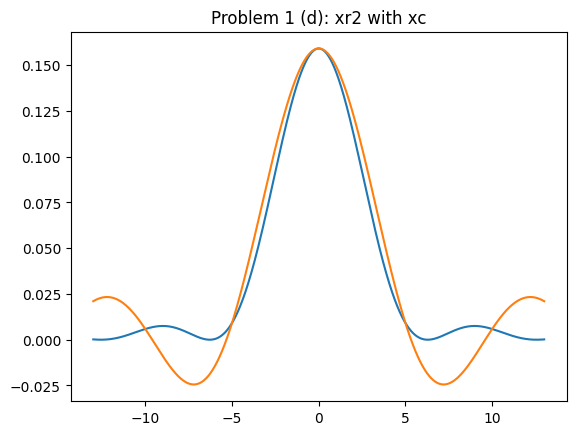

In [41]:
# Problem 1 (d)
def sinc_interpolate(x, T, N=73):
  @np.vectorize
  def xr(t):
    n = np.arange(-N, N + 1, dtype="float")
    fraction = np.sinc((t - n * T) / T)
    return np.sum(x(n) * fraction)
  return xr

xr1 = sinc_interpolate(x1, 1)
xr2 = sinc_interpolate(x2, 5)

t = np.linspace(-13, 13, 1000)
plt.plot(t, xc(t))
plt.plot(t, xr1(t))
plt.title("Problem 1 (d): xr1 with xc")
plt.show()

plt.plot(t, xc(t))
plt.plot(t, xr2(t))
plt.title("Problem 1 (d): xr2 with xc")
plt.show()




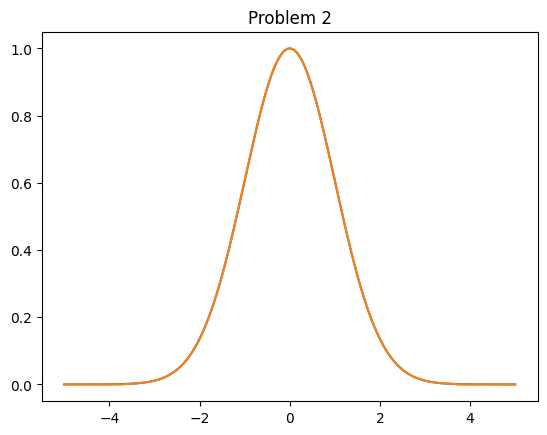

In [42]:
# Problem 2
def xc(t):
  t = np.array(t)
  return np.e ** (-(t ** 2) / 2)
xr = sinc_interpolate(sample(xc, 0.05), 0.05)

t = np.linspace(-5, 5, 1000)
plt.plot(t, xc(t))
plt.plot(t, xr(t))
plt.title("Problem 2")
plt.show()


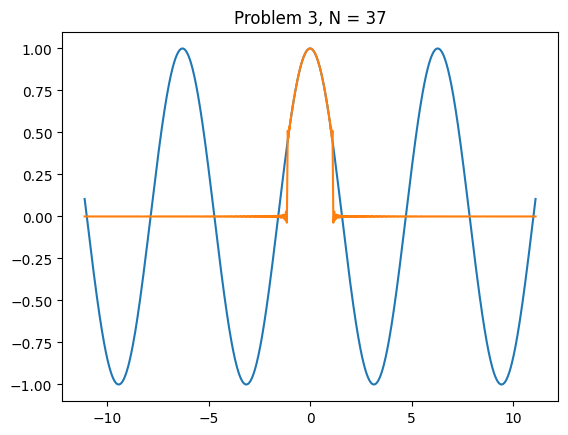

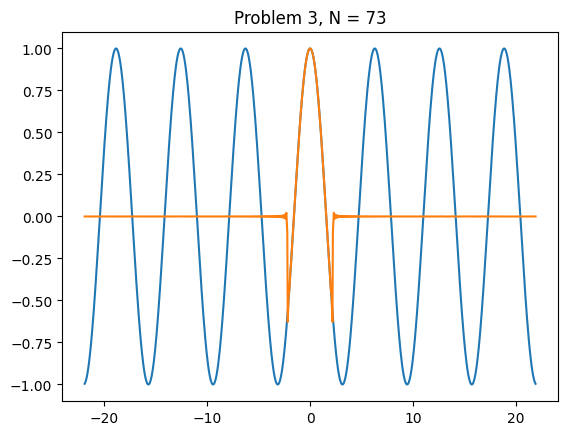

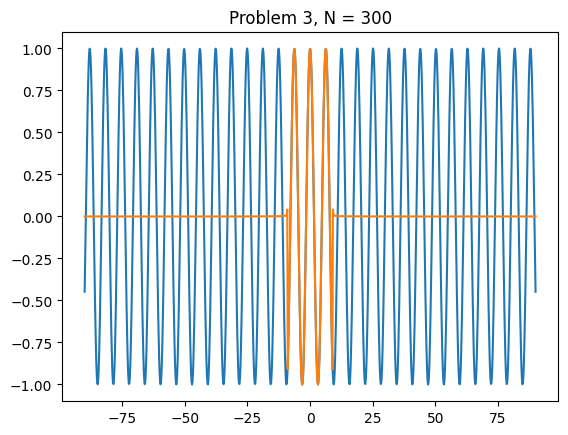

In [49]:
# Problem 3
xc = np.cos
x = sample(xc, 0.03)
for N in [37, 73, 300]:
  xr = sinc_interpolate(x, 0.03, N=N)
  t = np.linspace(-0.3 * N, 0.3 * N, 1000)
  plt.plot(t, xc(t))
  plt.plot(t, xr(t))
  plt.title(f"Problem 3, N = {N}")
  plt.show()


